# File I/O - LIVE Programming

Manipulating files is one of the most common functions of programs. Some of the uses include:
* Reading from a dataset to conduct analysis
* Writing the current results to a file
* Saving a model to a file so it can be reused later
* Storing user-based data in various files

Python gives us inbuilt functionality to deal with files.

Files must be _opened_ before they can be used in Python. The syntax to open is the following:
```
file_object = open(<file_path>, <access_mode>)
```

In [0]:
# NOTE: This only creates a test file to work with later on in the colab
# Just run this and ignore it
fp = open("read_test.txt", "w")
content = [f"This is line {i}!" for i in range(20)]
fp.write("\n".join(content))
fp.close()

In [0]:
# Open (in write mode) and write to file
fp = open("howdy.txt", "w")
fp.write("Howdy!")

# Now lets see what the file has in it (open in read mode)
fp = open("howdy.txt", "r")
fp.read()

### File Access Modes

When opening a file, an access mode needs to be provided. This defines how the file can be accessed / manipulated. There are the following access modes in Python:

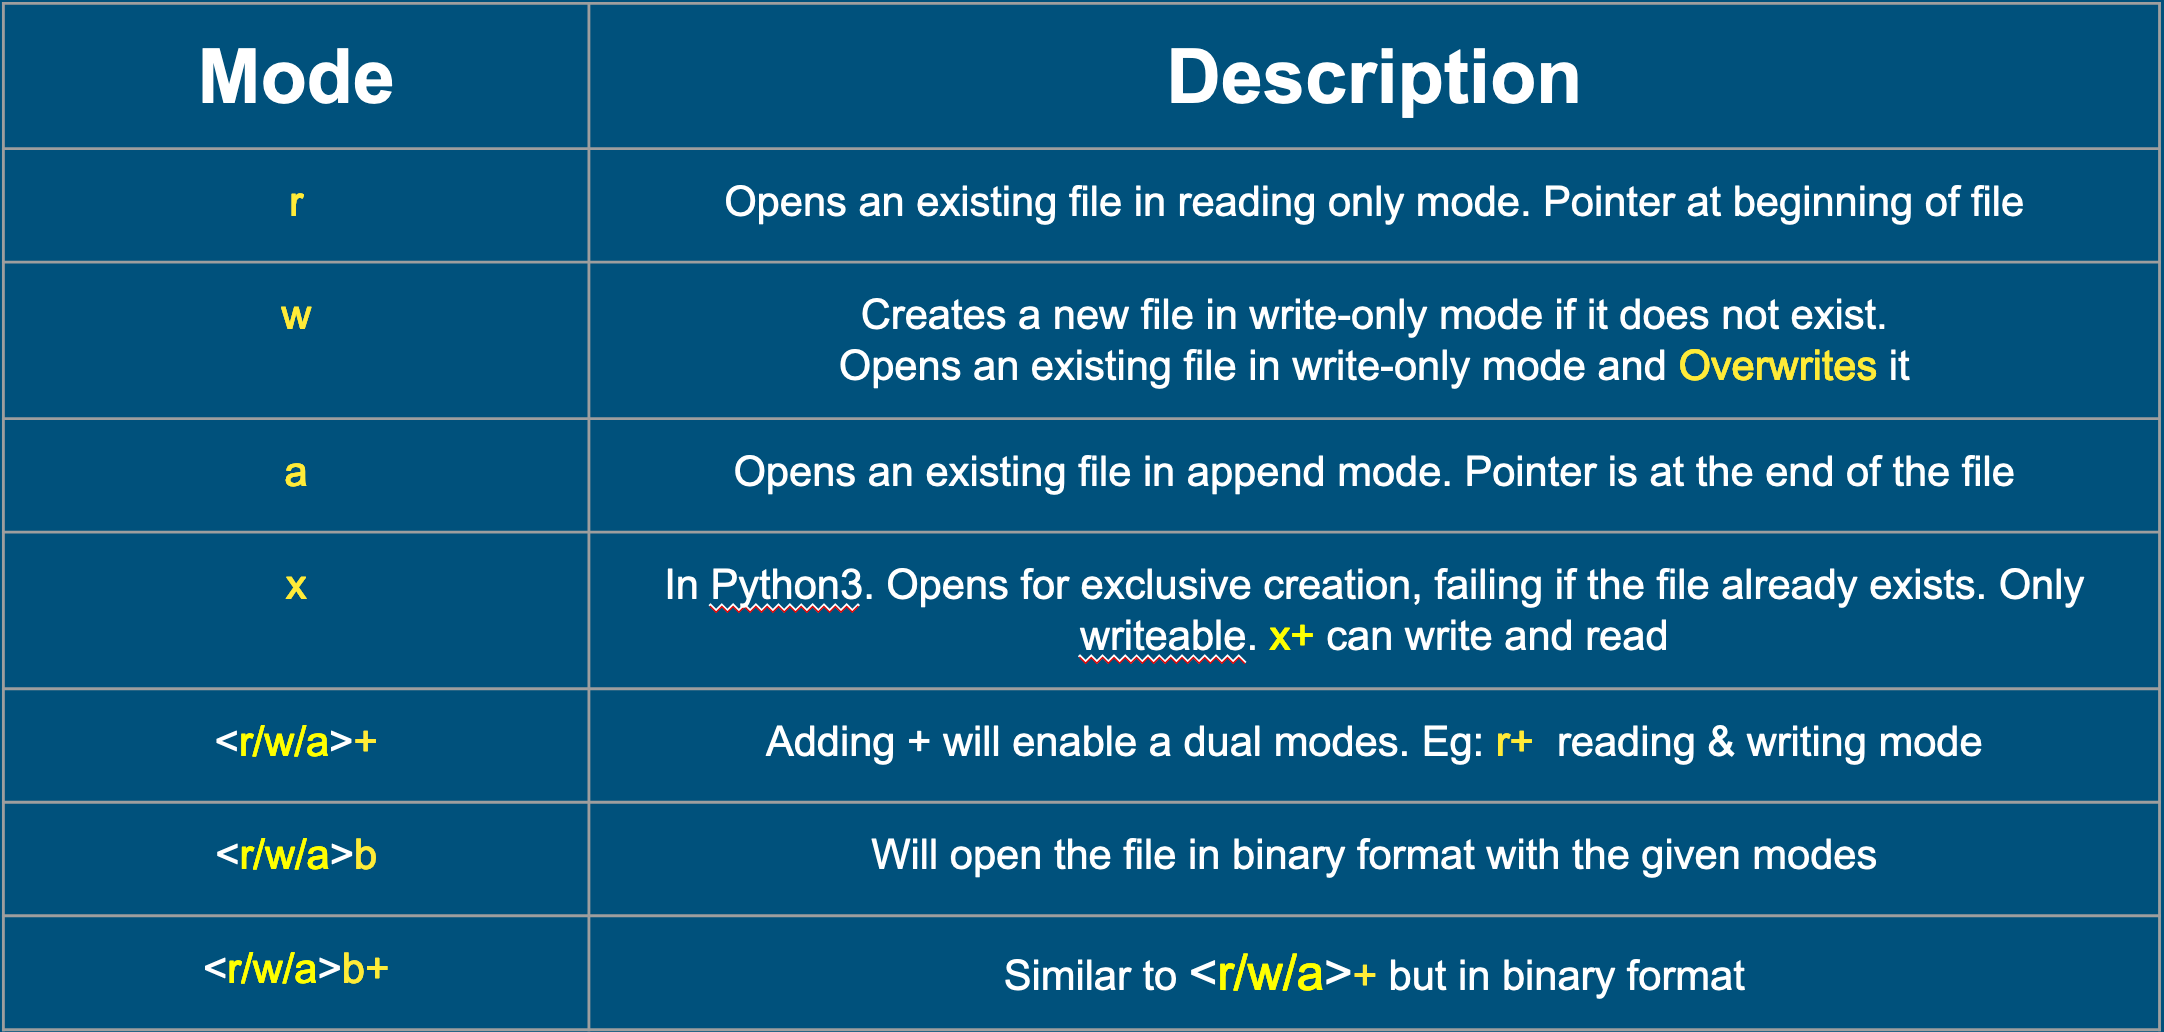

In [0]:
# Open existing file in read mode
fp = open("sample_data/README.md", "r")
fp.readline()

In [0]:
# Opening non-existent file in read only mode will fail
fp = open("this_file_does_not_exist.txt", "r")

In [0]:
# Open non-existing file in write mode
fp = open("test.txt", "w")
fp.write("We're testing the write functionality!")
# This will create a new file called write_test.txt if it doesn't exist


fp = open("test.txt", "r")
fp.read()

In [0]:
# Opening an existing file in write mode will overwrite it

fp = open("test.txt", "w")
fp.write("Over-wrote previous content.\n")
fp.write("Another line here.")


fp = open("test.txt", "r")
fp.read()

### Closing files

Once you're done with a file, it's a good idea to close it. Closing a file frees up memory used by the file object and prevents further use of the object.

In [0]:
# File objects cannot be used after being closed.
fp = open("test.txt", "r")
print(fp.readline())

fp.close()
# This will fail
fp.readline()

### Reading from files

We've got access to three functions when reading from files:
* `<file>.read()`: Returns all remaining file content as a string
* `<file>.readline()`: Reads the next line (ending at the newline character) and returns it as a string
* `<file>.readlines()`: Reads all remaining lines and returns them in a list

In [0]:
# Read all the content from a file
fp = open("read_test.txt", "r")
print(fp.read())

fp.close()

In [0]:
# Read one line at a time
fp = open("read_test.txt", "r")
print(fp.readline())
print(fp.readline())

fp.close()

In [0]:
# Read all lines in a file as a list
fp = open("read_test.txt", "r")
fp.readlines()

fp.close()

### Exercise 1: Number of words in a file

Can you count the number of words in the `read_test.txt` file?

In [0]:
# Exercise 1: Number of words in a file
num_words = 0

# Set num_words to the number of words in the read_text.txt file










print(f"Number of words in file: {num_words}")

##### Stuck? Here's a hint:

Try using the `<string>.split()` function to convert a string into a list of words!

#### Exercise 2: Read the given line from a file

Given the index of a line, can you make a program that returns that line from `read_test.txt`?

In [0]:
# Exercise 2: Read the given line from a file
line_index = int(input("Please enter the index of the line: "))

# Use this line index to set line_str to the correct line in read_test.txt
line_str = ""










print(f"Line {line_index}: {line_str}")

Read functions work according to the _file pointer_. When a file is opened, the pointer starts at the beginning of the file, but as read / write operations are performed, the pointer moves around. 

Below are a few examples of this:

In [0]:
# Using read() after a readline() will only read the remaining content
fp = open("read_test.txt", "r")
print(fp.readline())
print(fp.read())

fp.close()

### File Pointer

Operations on a file take into account the _file pointer_. This can be thought of as a _cursor_, something that shows what position in a file the file object is currently on. All read/write operations occur at the position the file pointer points to.

We can access/change the position of the pointer using the following functions:
* `<file>.tell()`: Returns the position of the file pointer
* `<file>.seek(<position>)`: Sets the file pointer to the given position in the file


In [0]:
# Reading a line from a file pushed up the file pointer
fp = open("read_test.txt", "r")

print(f"Current position in file: {fp.tell()}")
print(fp.readline())

print(f"Position in file after reading: {fp.tell()}")

fp.close()

In [0]:
# We can reset the position using seek()
fp = open("read_test.txt", "r")

print(f"Current position in file: {fp.tell()}")
print(fp.readline())

print(f"Position in file after reading: {fp.tell()}")
print(fp.readline())

print(f"Position in file after reading 2 lines: {fp.tell()}\n")
print("Resetting the file pointer to 0!")
fp.seek(0)
# This will print the first line again
print(fp.readline())
fp.close()

### Writing to files

We have access to the following functions to write to files:
* `<file>.write(<string>)`: Writes the given string to the file
* `<file>.writelines(<list>)`: Writes a concatenation of the strings in the given list to the file

All writes occur at (and after) the position specified by the file pointer.

In [0]:
# Open a non-existent file to test writes
fp = open("write_test.txt", "w")
fp.write("Testing out writes!")

# Let's test our write by reading from the file
fp = open("write_test.txt", "r")
print(fp.read())
fp.close()

In [0]:
# Try using writelines()
fp = open("write_test.txt", "w")
fp.writelines(["Writing line 1!\n", "Writing line 2 too."])

# Let's test our write by reading from the file
fp = open("write_test.txt", "r")
print(fp.read())
fp.close()

### The `with` statement

Opening and closing files are routing procedures that need to happen every time a file needs to be accessed. Python allows an easy way to accomplish this by using the `with` statement.

It allows us to open the file and specify a block inside which the file will be used, and closes the file automatically once the block is done executing. Syntax:
```
with <open_statement> as <file_object>:
  statements....
# File is automatically closed after block ends
```

In [0]:
# Doing a normal read using the with statement
with open("read_test.txt", "r") as fp:
  print(fp.read())

In [0]:
# Doing a normal write and then read, both using the with statement
with open("with_test.txt", "w") as fp:
  fp.write("Created using the 'with' statement")

with open("with_test.txt", "r") as fp:
  print(fp.read())

#### Exercise 3: Find unique letters in a file

Given a file name, can you write a program that returns all the unique letters in that file?

**Bonus:** Can you do so without using sets?

In [0]:
# Exercise 3: Find unique letters in a file

file_name = "read_test.txt"

# Print out the unique letters in the file pointed to by file_name









#### Exercise 4: Count number of occurences of a word in a file

Given a word as input from a user, can you check how many times it occurs in a file?

You can use the 'read_test.txt' as an example.

In [0]:
# Exercise 4: Count number of occurences of a word in a file
given_word = input("Please enter the word to find: ")
file_name = "read_test.txt"
num_occurences = 0

# Find the number of times given_word appears in the file and set num_occurences
# to that value








print(f"The word '{given_word}' occurs in file: {file_name}, {num_occurences} times")

### Opening different types of files

The basic Python functions can be used to process raw data from text or binary files. However, to handle more complex data like images and sound, we need to use libraries.

In [0]:
# Run this to download an image and sound file
%%capture
!wget -O google.png https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
!wget -O sample.wav https://file-examples.com/wp-content/uploads/2017/11/file_example_WAV_1MG.wav

The **PIL** library is commonly used to handle image files:

In [0]:
from PIL import Image
from IPython.display import display

img = Image.open("google.png")

display(img)

The **wave** module is used to work in _.wav_ files:

In [0]:
import wave

wav_file = wave.open("sample.wav")

print(f"Framerate: {wav_file.getframerate()}")
print(f"Number of frames: {wav_file.getnframes()}")

#### CSV Files

CSV files contain data as raw text and numbers, and thus can be manipulated using basic Python File I/O. However, the pandas library allows us to read them and work with them easily. 

_Pandas_ is a widely used library in the domain of Data Science.

In [0]:
import pandas as pd

data = pd.read_csv("sample_data/california_housing_test.csv")

data.head()

In [0]:
data.head(10)